In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


#IMPORTING LIBRARIES

In [2]:
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv("data.csv")
dataset.head()

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,sy11etry_1ean,fractal_di1ension_1ean,radius_se,texture_se,peri1eter_se,area_se,s1oothness_se,co1pactness_se,concavity_se,concave points_se,sy11etry_se,fractal_di1ension_se,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#HANDLING CATEGORICAL DATA

In [4]:
dataset=dataset.drop("id",1)

import pandas as pd 
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('data.csv') 
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[4.100e+01 1.000e+00 1.799e+01 ... 7.119e-01 2.654e-01 4.601e-01]
 [4.200e+01 1.000e+00 2.057e+01 ... 2.416e-01 1.860e-01 2.750e-01]
 [4.880e+02 1.000e+00 1.969e+01 ... 4.504e-01 2.430e-01 3.613e-01]
 ...
 [3.830e+02 1.000e+00 1.660e+01 ... 3.403e-01 1.418e-01 2.218e-01]
 [3.840e+02 1.000e+00 2.060e+01 ... 9.387e-01 2.650e-01 4.087e-01]
 [4.000e+01 0.000e+00 7.760e+00 ... 0.000e+00 0.000e+00 2.871e-01]]


In [5]:
x = dataset[['radius_1ean','fractal_di1ension_worst']]
#separate the other attributes from the predicting attribute

In [6]:
y = dataset[['diagnosis']]
#separte the predicting attribute into Y for model training 

#GRAPHS

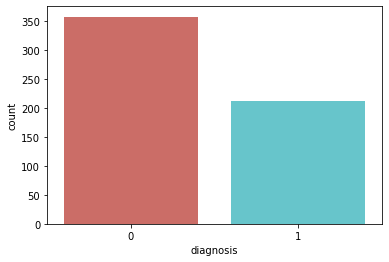

In [7]:
seaborn.countplot(x='diagnosis',data=dataset, palette='hls')
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [8]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#NORMALIZING DATA

In [9]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#ALGORITHM

In [10]:
classifier = svm.SVC(kernel ='linear')

#FITTING OF TRAINING DATA

In [11]:
classifier.fit(X_Train,Y_Train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [12]:
Y_Pred = classifier.predict(X_Test)

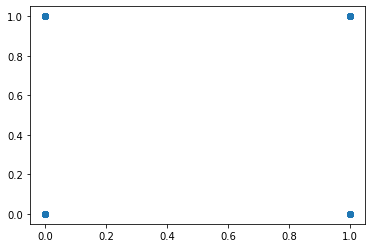

In [13]:
plt.scatter(Y_Test,Y_Pred)

#EVALUATION

In [14]:
print('Mean abolute error is:', metrics.mean_absolute_error(Y_Test,Y_Pred))
print('Mean squared error is:', metrics.mean_squared_error(Y_Test,Y_Pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(Y_Test,Y_Pred)))

Mean abolute error is: 0.11188811188811189
Mean squared error is: 0.11188811188811189
Root mean squared error is: 0.3344968040028363


In [15]:
print(metrics.accuracy_score(Y_Test, Y_Pred))

0.8881118881118881


#SAVING THE MODEL USING PICKLE LIBRARY

In [16]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(classifier) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(X_Test) 


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [18]:
Y_Train = Y_Train[0:116]
Y_Pred = Y_Pred[0:116]
cm = confusion_matrix(Y_Train, Y_Pred)
print(cm)

[[41 30]
 [28 17]]


Precision, Recall, Support, Fscore

In [19]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_Train, Y_Pred, average='macro')

(0.4779525131051495, 0.47762128325508607, 0.47763975155279503, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [20]:
Y_Test = Y_Test[0:116]
results =confusion_matrix(Y_Test, Y_Pred)
print(results)

[[63  6]
 [ 6 41]]


Precision, Recall, Support, Fscore

In [21]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(Y_Test, Y_Pred, average='macro')

(0.8926919518963923, 0.8926919518963923, 0.8926919518963923, None)